# Space Flight Trajectory

In [1]:
using PyPlot
using Interact

In [17]:
function trajectory(V, altitude, angle_above_horizontal, latitude)

    # ---- constants -------
    re = 6374.2e3  # m (radius of earth)
    mu = 3.986e14  # GM (earth)

    # angular momentum
    rb = re + altitude
    Vtheta = V*cos(angle_above_horizontal)
    h = rb*Vtheta
    p = h^2/mu

    # eccentricity
    t = V^2/2
    phi = mu/rb
    H = t - phi
    e = sqrt(1 + 2*h^2*H/mu^2)

    # angle offset
    C = -acos(1.0/e*(p/rb - 1))

    # compute r locations
    theta = linspace(0, 2*pi, 500)
    r = p./(1 + e*cos.(theta-C))

    xrot = r.*cos.(theta)
    yrot = r.*sin.(theta)

    # rotate coordinate system
    x = xrot*cos(latitude) - yrot*sin(latitude)
    y = xrot*sin(latitude) + yrot*cos(latitude)

    # earth outline
    xe = re*cos.(theta)
    ye = re*sin.(theta)


    return x, y, xe, ye
end;

The following inputs can be changed in the sliders:
- V (m/s)
- altitude (m)
- angle above horizontal (deg)
- latitude (deg)

Interact.Options{:SelectionSlider,Any}(127: "input-47" = 9000 Any , "V", 9000, "9000", 13, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("6000"=>6000,"6250"=>6250,"6500"=>6500,"6750"=>6750,"7000"=>7000,"7250"=>7250,"7500"=>7500,"7750"=>7750,"8000"=>8000,"8250"=>8250…), Dict{Any,Any}(Pair{Any,Any}(11500, "11500"),Pair{Any,Any}(11000, "11000"),Pair{Any,Any}(9750, "9750"),Pair{Any,Any}(7750, "7750"),Pair{Any,Any}(12000, "12000"),Pair{Any,Any}(10000, "10000"),Pair{Any,Any}(11250, "11250"),Pair{Any,Any}(7000, "7000"),Pair{Any,Any}(7250, "7250"),Pair{Any,Any}(9000, "9000")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(129: "input-48" = 900000.0 Any , "altitude", 900000.0, "900000.0", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("400000.0"=>400000.0,"500000.0"=>500000.0,"600000.0"=>600000.0,"700000.0"=>700000.0,"800000.0"=>800000.0,"900000.0"=>900000.0,"1.0e6"=>1.0e6,"1.1e6"=>1.1e6,"1.2e6"=>1.2e6,"1.3e6"=>1.3e6…), Dict{Any,Any}(Pair{Any,Any}(700000.0, "700000.0"),Pair{Any,Any}(900000.0, "900000.0"),Pair{Any,Any}(400000.0, "400000.0"),Pair{Any,Any}(1.0e6, "1.0e6"),Pair{Any,Any}(500000.0, "500000.0"),Pair{Any,Any}(800000.0, "800000.0"),Pair{Any,Any}(1.4e6, "1.4e6"),Pair{Any,Any}(600000.0, "600000.0"),Pair{Any,Any}(1.1e6, "1.1e6"),Pair{Any,Any}(1.3e6, "1.3e6")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(131: "input-49" = 5 Any , "angle", 5, "5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(133: "input-50" = 22 Any , "latitude", 22, "22", 23, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(42, "42"),Pair{Any,Any}(29, "29"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(20, "20"),Pair{Any,Any}(14, "14"),Pair{Any,Any}(31, "31")…)), Any[], Any[], true, "horizontal")

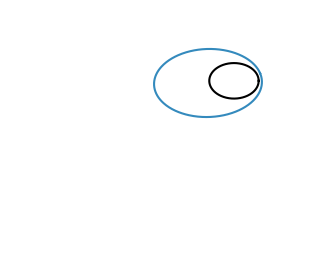

In [23]:
f = figure()

@manipulate for V=6000:250:12000, altitude=400e3:100e3:1500e3, angle=0:1:10, latitude=0:1:45; 
    withfig(f) do
        x, y, xe, ye = trajectory(V, altitude, angle*pi/180, latitude*pi/180)
        plot(xe, ye, "k")
        plot(x, y)
        xlim([-0.5e8, 0.2e8])
        ylim([-0.5e8, 0.2e8])
        axis("off")
    end
end

